# Introduction

<div class="alert alert-warning">
<font color=black>

**What?** Predicting red-wine quality with ANNs + Dropout and Batch Normalisation

</font>
</div>

# Theoretical recall: dropout

<div class="alert alert-block alert-info">
<font color=black><br>

- Dropout layer can help correct overfitting which is caused by the network **learning spurious patterns** in the training data.
- To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.
- This is the idea behind dropout. To break up these conspiracies, we randomly drop out some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. 
- Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.
- You could also think about dropout as creating a kind of ensemble of networks. 
- The predictions will no longer be made by one big network, but instead by a committee of smaller networks. 
- Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual. 
- If you're familiar with random forests as an ensemble of decision trees, it's the same idea.

<br></font>
</div>

# Theoretical recall: batch normalisation

<div class="alert alert-block alert-info">
<font color=black><br>

- Batchnorm can help correct training that is slow or unstable.
- Sometimes also help prediction performance.
- SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.
- If it's good to normalize the data before it goes into the network, maybe also normalizing inside the network would be better! In fact, we have a special kind of layer that can do this, the batch normalization layer. A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

<br></font>
</div>

# Import modules

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import layers, callbacks

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

# Import dataset

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll use the *Red Wine Quality* dataset.
- This dataset consists of physiochemical measurements from about 1600 Portuguese red wines. 
- Also included is a quality rating for each wine from blind taste-tests. 
- How well can we predict a wine's perceived quality from these measurements?

<br></font>
</div>

In [2]:
red_wine = pd.read_csv('../DATASETS/winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
print(X_train.shape)

(1119, 11)


# Building the ANNs

<div class="alert alert-block alert-info">
<font color=black><br>

- We've chosen a three-layer network with over 1500 neurons. 
- This network should be capable of learning fairly complex relationships in the data. 

<br></font>
</div>

In [4]:
model = keras.Sequential([
    layers.Dense(1024, activation = 'relu', input_shape = [11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [6]:
early_stopping = callbacks.EarlyStopping(
    # Minimium amount of change to count as an improvement
    min_delta=0.001, 
    # How many epochs to wait before stopping
    patience = 50, 
    restore_best_weights=True,
)

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 500 times all the way through the dataset (the epochs).
- Since we are using early atopping, we'll probably not reach the 500th epoch.

<br></font>
</div>

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size = 256,
    epochs = 500,
    callbacks = [early_stopping],
    verbose = 1,  
)

Epoch 1/500
5/5 [==============================] - 1s 76ms/step - loss: 1.2765 - val_loss: 0.3911
Epoch 2/500
5/5 [==============================] - 0s 41ms/step - loss: 1.2757 - val_loss: 0.1932
Epoch 3/500
5/5 [==============================] - 0s 45ms/step - loss: 1.1616 - val_loss: 0.1520
Epoch 4/500
5/5 [==============================] - 0s 45ms/step - loss: 1.0686 - val_loss: 0.1429
Epoch 5/500
5/5 [==============================] - 0s 41ms/step - loss: 0.9524 - val_loss: 0.1704
Epoch 6/500
5/5 [==============================] - 0s 42ms/step - loss: 1.0223 - val_loss: 0.1311
Epoch 7/500
5/5 [==============================] - 0s 42ms/step - loss: 0.8456 - val_loss: 0.1536
Epoch 8/500
5/5 [==============================] - 0s 41ms/step - loss: 0.7785 - val_loss: 0.1336
Epoch 9/500
5/5 [==============================] - 0s 40ms/step - loss: 0.7249 - val_loss: 0.1441
Epoch 10/500
5/5 [==============================] - 0s 42ms/step - loss: 0.6680 - val_loss: 0.1429
Epoch 11/500
5/5 [=

Epoch 84/500
5/5 [==============================] - 0s 39ms/step - loss: 0.1191 - val_loss: 0.1164
Epoch 85/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1161 - val_loss: 0.1167
Epoch 86/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1164 - val_loss: 0.1168
Epoch 87/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1221 - val_loss: 0.1169
Epoch 88/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1169 - val_loss: 0.1160
Epoch 89/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1154 - val_loss: 0.1137
Epoch 90/500
5/5 [==============================] - 0s 39ms/step - loss: 0.1204 - val_loss: 0.1127
Epoch 91/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1165 - val_loss: 0.1144
Epoch 92/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1189 - val_loss: 0.1128
Epoch 93/500
5/5 [==============================] - 0s 38ms/step - loss: 0.1130 - val_loss: 0.1099
Epoch 94/5

5/5 [==============================] - 0s 40ms/step - loss: 0.0967 - val_loss: 0.0936
Epoch 167/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0959 - val_loss: 0.0962
Epoch 168/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0967 - val_loss: 0.0956
Epoch 169/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0995 - val_loss: 0.1049
Epoch 170/500
5/5 [==============================] - 0s 41ms/step - loss: 0.1050 - val_loss: 0.0932
Epoch 171/500
5/5 [==============================] - 0s 40ms/step - loss: 0.1020 - val_loss: 0.1019
Epoch 172/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0998 - val_loss: 0.0940
Epoch 173/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0964 - val_loss: 0.0917
Epoch 174/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0984 - val_loss: 0.0969
Epoch 175/500
5/5 [==============================] - 0s 42ms/step - loss: 0.1060 - val_loss: 0.0983
Epoch 176/500


Minimum validation loss: 0.09100586920976639


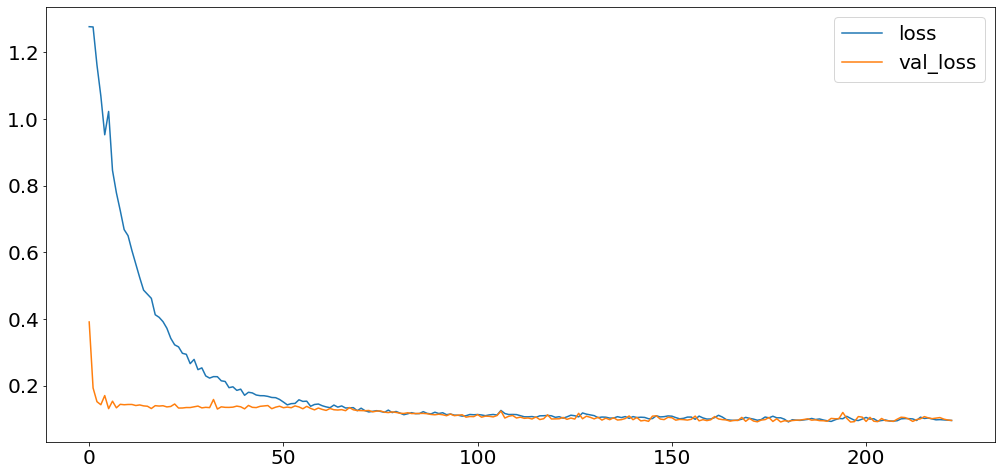

In [8]:
# Convert the training history to a dataframe and plot
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

<div class="alert alert-block alert-info">
<font color=black><br>

- Notice how the loss levels off as the epochs go by. 
- When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.
- Please note that if we did not use early stopping the model would have gone all the way to 500 probably overfitting.

<br></font>
</div>

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent
- https://www.kaggle.com/ryanholbrook/dropout-and-batch-normalization
    
<br></font>
</div>